In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform as sp_uniform, randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier 

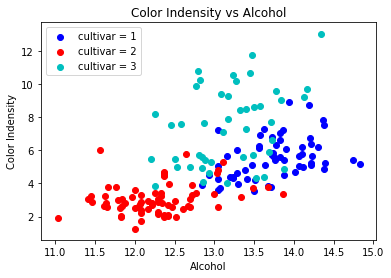

In [2]:
#1.a
df = pd.read_csv('data/strongdrink.txt')
alco = df['alco']
color_int = df['color_int']
plt.scatter(alco[df['cultivar']==1],color_int[df['cultivar']==1], 
            color = 'b', label = 'cultivar = 1')
plt.scatter(alco[df['cultivar']==2],color_int[df['cultivar']==2], 
            color = 'r', label = 'cultivar = 2')
plt.scatter(alco[df['cultivar']==3],color_int[df['cultivar']==3], 
            color = 'c', label = 'cultivar = 3')
plt.title('Color Indensity vs Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Color Indensity')
plt.legend()
plt.show()

In [3]:
#1.b
X = df[['alco','malic','tot_phen','color_int']]
y = df['cultivar']
LR = LogisticRegression(random_state=25)
param_dist1 = {'penalty': ['l1', 'l2'], 'C': sp_uniform(0.1, 10.0)}
lr = RandomizedSearchCV(LR, param_dist1, 
            n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error').fit(X, y)
print('Best tuning parameter:', lr.best_params_)
print('MSE:', abs(lr.best_score_))

Best tuning parameter: {'C': 2.665871587495725, 'penalty': 'l1'}
MSE: 0.11931818181818182


C:\Users\brend.000\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\brend.000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\brend.000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\brend.000\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [18]:
#1.c
param_dist2 = {'n_estimators': sp_randint(10, 200),
               'max_depth': sp_randint(2, 4),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}
RFC = RandomForestClassifier(random_state=25).fit(X, y)
rf = RandomizedSearchCV(RFC, param_dist2, 
         n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error').fit(X, y)
print('Best tuning parameter:', rf.best_params_)
print('MSE:', abs(rf.best_score_))

C:\Users\brend.000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best tuning parameter: {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 13, 'min_samples_split': 18, 'n_estimators': 176}
MSE: 0.13068181818181818


C:\Users\brend.000\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [19]:
#1.d
svc = SVC(kernel="rbf", degree=2).fit(X, y)
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}
random_SVC = RandomizedSearchCV(svc, param_dist3, 
        n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error').fit(X, y)
print('Best tuning parameter:', random_SVC.best_params_)
print('MSE:', abs(random_SVC.best_score_))

C:\Users\brend.000\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best tuning parameter: {'C': 9.58835943424229, 'gamma': 'scale', 'shrinking': True}
MSE: 0.13636363636363635


C:\Users\brend.000\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [17]:
#1.e
param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
               'activation': ['logistic', 'relu'],
               'alpha': sp_uniform(0.1, 10.0)}
mlp = MLPClassifier(activation='tanh', solver='lbfgs', alpha=0.1).fit(X, y)
random_MLP = RandomizedSearchCV(mlp, param_dist4, 
        n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error').fit(X, y)
print('Best tuning parameter:', random_MLP.best_params_)
print('MSE:', abs(random_MLP.best_score_))

Best tuning parameter: {'activation': 'relu', 'alpha': 0.3814739739579308, 'hidden_layer_sizes': 42}
MSE: 0.09090909090909091


C:\Users\brend.000\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(f) Because the neural net MSLP has the smallest MSE value, it is the best predictor.